In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

# Question 1:
What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
import acquire as ac
import prepare as pr

In [3]:
titanic = ac.get_titanic_data()

In [4]:
train,val, test = pr.prep_titanic_data(titanic)

In [5]:
train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
313,0,3,28.000000,0,0,7.8958,1,1,0,1
636,0,3,32.000000,0,0,7.9250,1,1,0,1
222,0,3,51.000000,0,0,8.0500,1,1,0,1
485,0,3,29.678105,3,1,25.4667,0,0,0,1


In [6]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

In [7]:
#baseline: the mode is the most frequent outcome
baseline = y_train.mode()

# Produce a boolean array with the True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")



Baseline accuracy: 0.62


# Question 2:
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [8]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   498 non-null    int64  
 1   age                      498 non-null    float64
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 28.7 KB


,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,0,0,40.1250,1,1,0,0
165,3,9.000000,0,2,20.5250,0,1,0,1
50,3,7.000000,4,1,39.6875,0,1,0,1
259,2,50.000000,0,1,26.0000,0,0,0,1
306,1,29.678105,0,0,110.8833,1,0,0,0


In [9]:
# making the model:
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

In [10]:
# fit the model:
tree = tree.fit(X_train, y_train)

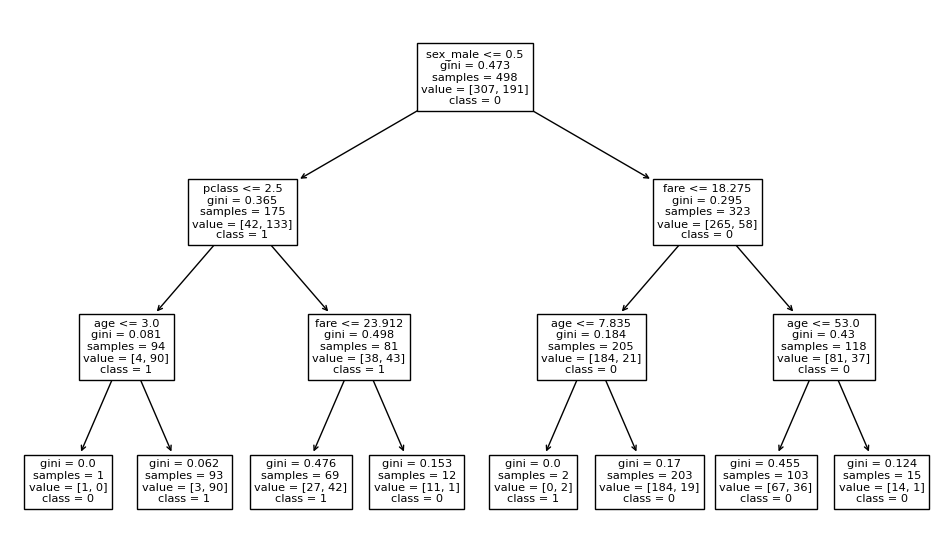

In [11]:
# plot the figure:
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns.tolist(), class_names=['0','1'])
plt.show()

In [12]:
# make predictions:
tree.predict(X_train)[:5]

array([0, 0, 0, 1, 1])

In [13]:
tree.score(X_train, y_train)

0.8253012048192772

# Question 3:
Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [14]:
# making predictions for surivived 
y_pred = tree.predict(X_train)

In [15]:
# make confusion matrix
con = confusion_matrix(y_train, y_pred)
con

array([[277,  30],
       [ 57, 134]])

In [16]:
labels = [0, 1]

In [17]:
pd.DataFrame(con, 
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,277,30
1_actual,57,134


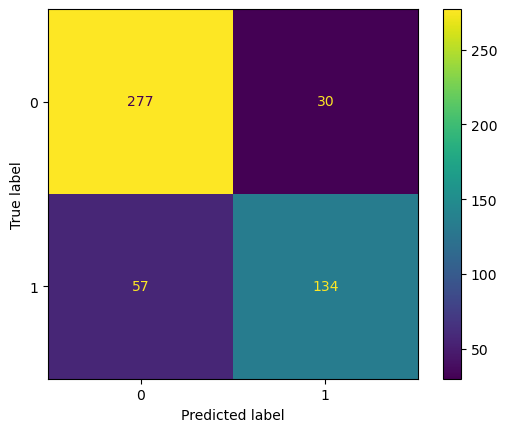

In [18]:
# another view of the confusion matrix:
disp = ConfusionMatrixDisplay(confusion_matrix=con, display_labels=tree.classes_)
disp.plot()
plt.show()

In [19]:
# classification report:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



# Question 4: 
Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [20]:
con.ravel()

array([277,  30,  57, 134])

In [21]:
# setting confusion matrix variables
TN, FP, FN, TP = con.ravel()
TN, FP, FN, TP

(277, 30, 57, 134)

In [22]:
# confusion matrix equations:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [23]:
# running the calculations:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.8253012048192772

True Positive Rate/Sensitivity/Recall/Power: 0.7015706806282722
False Positive Rate/False Alarm Ratio/Fall-out: 0.09771986970684039
True Negative Rate/Specificity/Selectivity: 0.9022801302931596
False Negative Rate/Miss Rate: 0.29842931937172773

Precision/PPV: 0.8170731707317073
F1 Score: 0.7549295774647887

Support (0): 191
Support (1): 307


# Question 5:
Run through steps 2-4 using a different max_depth value.

In [25]:
#for lots
for x in range(1,20):
#     print(x)
    clf = DecisionTreeClassifier(max_depth=x)
    clf.fit(X_train, y_train)
    acc = clf.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.8
for depth of  2, the accuracy is 0.8
for depth of  3, the accuracy is 0.83
for depth of  4, the accuracy is 0.84
for depth of  5, the accuracy is 0.85
for depth of  6, the accuracy is 0.87
for depth of  7, the accuracy is 0.89
for depth of  8, the accuracy is 0.9
for depth of  9, the accuracy is 0.92
for depth of 10, the accuracy is 0.93
for depth of 11, the accuracy is 0.96
for depth of 12, the accuracy is 0.97
for depth of 13, the accuracy is 0.98
for depth of 14, the accuracy is 0.99
for depth of 15, the accuracy is 1.0
for depth of 16, the accuracy is 1.0
for depth of 17, the accuracy is 1.0
for depth of 18, the accuracy is 1.0
for depth of 19, the accuracy is 1.0


In [24]:
# making a loop to speed up the process of making the models.
for i in range(1, 21):
    # Make the model
    trees = DecisionTreeClassifier(max_depth=i, random_state=1349)

    # Fit the model (on train and only train)
    trees = trees.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = trees.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     

# Question 6:
Which model performs better on your in-sample data?


models with a depth of 15 or more have a higher accuracy

# Question 7:
Which model performs best on your out-of-sample data, the validate set?

In [28]:
X_val = val.drop(columns='survived')
y_val = val.survived

X_test = test.drop(columns='survived')
y_test = test.survived

In [29]:
metrics = []

for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
4,5,0.853414,0.799065,0.054348
5,6,0.865462,0.789720,0.075742
6,7,0.885542,0.780374,0.105168
7,8,0.897590,0.799065,0.098525
8,9,0.921687,0.794393,0.127294
9,10,0.933735,0.789720,0.144015


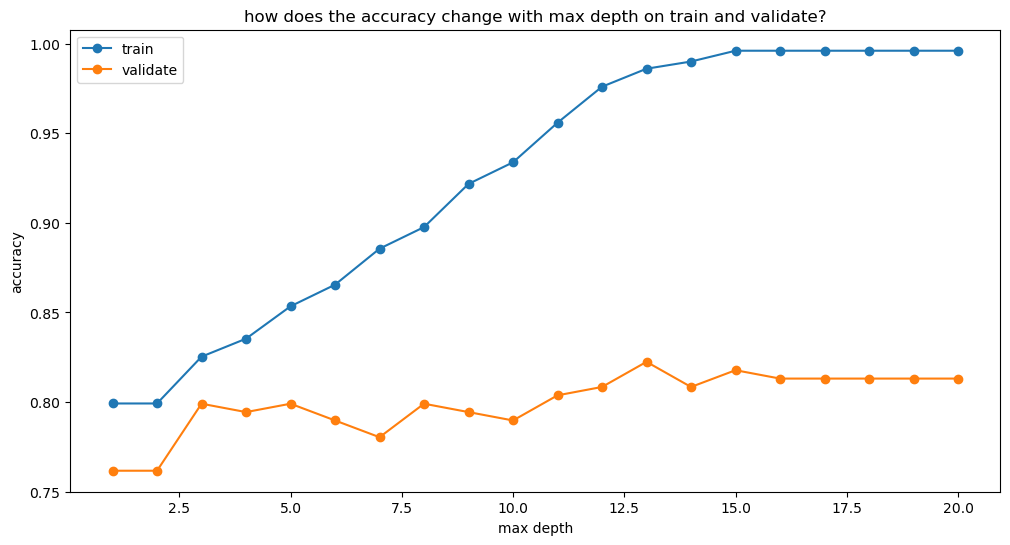

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, label='train', marker='o')
plt.plot(df.max_depth, df.validate_accuracy, label='validate', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

-------------------------------------------------------------------

# Question 1:
Work through the telco dataset using these same exercises